# Analysis

## Introduction
With the rise of Netflix, Disney +, Apple TV and other streaming services growing rapidly with popularity, one must wonder: Is the movie industry is dying? Are streaming services the new king of entertainment? And if movies are not dead, what is driving the gross earnings in the movie industry?

With this questions in mind, my exploratory data project aims to:

1. Examine how the movie industry been performing in recent years;
2. Visualize the relationship of different variables with movie gross earnings;
3. Explore the variables that have the highest correlation with movie gross earnings

## Importing Libraries

In [54]:
from mysql.connector import connect
from getpass import getpass
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import matplotlib.ticker as mticker
plt.style.use('default')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,10)

## Connecting to database and fetching dataframe

In [55]:
connection = connect(
    host = "34.135.100.172",
    user = input("Enter username: "),
    password = getpass("Enter password: "),
    auth_plugin = 'mysql_native_password',
    database = 'imdb'
    )

cursor = connection.cursor(buffered=True)

query = '''select * from IMDB'''
cursor.execute(query)
df = pd.DataFrame(cursor.fetchall(), columns=['name', 'year', 'link', 'number_of_ratings', 'imdb_ratings','gross_earnings', 'movie_budget','runtime'])
cursor.close()
connection.close()

In [56]:
df

,name,year,link,number_of_ratings,imdb_ratings,gross_earnings,movie_budget,runtime
0,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161/,2580089,9.2,"$28,884,504","$25,000,000",142
1,The Godfather,1972,https://www.imdb.com/title/tt0068646/,1776313,9.2,"$250,341,816","$6,000,000",175
2,The Dark Knight,2008,https://www.imdb.com/title/tt0468569/,2549122,9.0,"$1,006,102,277","$185,000,000",152
3,The Godfather: Part II,1974,https://www.imdb.com/title/tt0071562/,1228038,9.0,"$47,961,010","$13,000,000",202
4,12 Angry Men,1957,https://www.imdb.com/title/tt0050083/,761987,8.9,$955,"$350,000",96
...,...,...,...,...,...,...,...,...
245,Aladdin,1992,https://www.imdb.com/title/tt0103639/,401818,8.0,"$504,050,219","$28,000,000",90
246,The Help,2011,https://www.imdb.com/title/tt1454029/,449133,8.0,"$216,639,112","$25,000,000",146
247,Beauty and the Beast,1991,https://www.imdb.com/title/tt0101414/,441140,8.0,"$424,967,620","$25,000,000",84
248,Du rififi chez les hommes,1955,https://www.imdb.com/title/tt0048021/,33766,8.0,"$521,342",NA,118


## Data Cleaning

### Checking for null values

In [7]:
# Replace NA strings with np.nan
for col in df.columns:
    df[col].replace('NA', np.nan, inplace=True)

In [8]:
# Checking for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')

name - 0.0%
year - 0.0%
link - 0.0%
number_of_ratings - 0.0%
imdb_ratings - 0.0%
gross_earnings - 0.032%
movie_budget - 0.088%
runtime - 0.0%


In [130]:
cols_with_missing_values = ['gross_earnings', 'movie_budget', 'runtime']
for col in cols_with_missing_values:
    print(f'Rows with NA values for {col} column:')
    print(df[df[col].isnull()])
    print('--------------------------------------')

Rows with NA values for gross_earnings column:
                      name  year                                   link  \
111               Hamilton  2020  https://www.imdb.com/title/tt8503618/   
175      On the Waterfront  1954  https://www.imdb.com/title/tt0047296/   
180            The General  1926  https://www.imdb.com/title/tt0017925/   
191               Sherlock  1924  https://www.imdb.com/title/tt0015324/   
198                  Klaus  2019  https://www.imdb.com/title/tt4729430/   
230    The Grapes of Wrath  1940  https://www.imdb.com/title/tt0032551/   
231         Cool Hand Luke  1967  https://www.imdb.com/title/tt0061512/   
241  It Happened One Night  1934  https://www.imdb.com/title/tt0025316/   

     number_of_ratings  imdb_ratings gross_earnings movie_budget runtime  
111              86327           8.2            NaN          NaN     160  
175             152474           8.1            NaN     $910,000     108  
180              89699           8.1            NaN 

Looking at the rows with missing values, it seems that the occurrences of missing values for these columns missing at random and there are no discernable patterns between the rows of missing values for these 2 columns. 

In [9]:
# Dropping other NaN rows
df.dropna(inplace=True)

In [10]:
# Checking that all NaN rows were dropped
df.isnull().sum()

name                 0
year                 0
link                 0
number_of_ratings    0
imdb_ratings         0
gross_earnings       0
movie_budget         0
runtime              0
dtype: int64

### Cleaning up runtime column

In [11]:
df.runtime.unique()

array(['142', '175', '152', '202', '96', '195', '201', '154', '178',
       '161', '139', '148', '179', '124', '136', '145', '133', '127',
       '207', '130', '118', '169', '116', '189', '121', '137', '125',
       '109', '150', '110', '132', '88', '119', '155', '106', '151',
       '102', '112', '87', '165', '89', '117', '113', '147', '115', '98',
       '146', '149', '122', '95', '164', '2 hours', '160', '81', '105',
       '153', '134', '229', '181', '126', '103', '131', '170', '99',
       '108', '218', '128', '107', '114', '129', '138', '104', '123',
       '156', '140', '68', '3 hours', '162', '91', '158', '135', '172',
       '111', '100', '238', '93', '86', '141', '212', '183', '101', '185',
       '92', '80', '94', '143', '191', '90', '84'], dtype=object)

Runtime column has entries that are not converted into minutes yet, some entries are in the form of XX hours.

In [12]:
# Converting df.runtime to minutes
for index, item in df.runtime.items():
    if 'hours' in item:
        df.runtime[index] = str(int(df.runtime[index].strip('hours'))*60)

/var/folders/3w/jcd4m_yd28g3x8_2jm8s9k580000gn/T/ipykernel_32128/3832826543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.runtime[index] = str(int(df.runtime[index].strip('hours'))*60)


In [13]:
df.runtime.unique()

array(['142', '175', '152', '202', '96', '195', '201', '154', '178',
       '161', '139', '148', '179', '124', '136', '145', '133', '127',
       '207', '130', '118', '169', '116', '189', '121', '137', '125',
       '109', '150', '110', '132', '88', '119', '155', '106', '151',
       '102', '112', '87', '165', '89', '117', '113', '147', '115', '98',
       '146', '149', '122', '95', '164', '120', '160', '81', '105', '153',
       '134', '229', '181', '126', '103', '131', '170', '99', '108',
       '218', '128', '107', '114', '129', '138', '104', '123', '156',
       '140', '68', '180', '162', '91', '158', '135', '172', '111', '100',
       '238', '93', '86', '141', '212', '183', '101', '185', '92', '80',
       '94', '143', '191', '90', '84'], dtype=object)

### Cleaning up gross_earnings and movie_budget

In [14]:
# Investigating all unique dollar signs
print('All unique dollar signs for gross earnings:')
print(df['gross_earnings'].str[0].unique())
print('All unique dollar signs for movie budgets:')
print(df['movie_budget'].str[0].unique())

# Investigating movie budget values that start with alphabets
print('All movie budget values that start with alphabets:')
startwithalpha_indices = []
for index, budget in df.movie_budget.items():
    if budget[0].isalpha():
        startwithalpha_indices.append(index)
        print(index, budget)

All unique dollar signs for gross earnings:
['$']
All unique dollar signs for movie budgets:
['$' '¥' 'R' 'F' '€' 'D' '₹' '£' 'M' 'A' '₩']
All movie budget values that start with alphabets:
22 R$3,300,000
33 FRF
75 DEM
115 DEM
174 MVR
202 A$8,240,000


The rows with movie budget values that are only alphabets are meaningless and can be dropped.

In [15]:
only_alpha_indices = [index for index in startwithalpha_indices if df.movie_budget[index].isalpha()]
print(only_alpha_indices)

[33, 75, 115, 174]


In [16]:
df = df.drop(only_alpha_indices) # Dropping values by index

In [17]:
for i in only_alpha_indices:
    startwithalpha_indices.remove(i)

for i in startwithalpha_indices:
    df.movie_budget[i] = df.movie_budget[i][1:]

/var/folders/3w/jcd4m_yd28g3x8_2jm8s9k580000gn/T/ipykernel_32128/1227519961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.movie_budget[i] = df.movie_budget[i][1:]


In [18]:
# Investigating all unique dollar signs
print('All unique dollar signs for gross earnings:')
print(df['gross_earnings'].str[0].unique())
print('All unique dollar signs for movie budgets:')
print(df['movie_budget'].str[0].unique())

# Investigating movie budget values that start with alphabets
print('All movie budget values that start with alphabets:')
startwithalpha_indices = []
for index, budget in df.movie_budget.items():
    if budget[0].isalpha():
        startwithalpha_indices.append(index)
        print(index, budget)

All unique dollar signs for gross earnings:
['$']
All unique dollar signs for movie budgets:
['$' '¥' '€' '₹' '£' '₩']
All movie budget values that start with alphabets:


To facilitate a fair analysis, we have to convert all currencies into USD.

To do so we can create a currency converter class

In [19]:
import requests

class RealTimeCurrencyConverter():
    def __init__(self, url):
      self.data = requests.get(url).json()
      self.currencies = self.data['rates'] # rate are in /USD values
      
    def convert_to_usd(self, from_currency, amount):
        if from_currency != 'USD':
            amount /= self.currencies[from_currency]
        return round(amount, None)

url = 'https://api.exchangerate-api.com/v4/latest/USD'
converter = RealTimeCurrencyConverter(url)
        

Then create a new column of integer values for movie budgets without currency sign (in USD).

In [20]:
currencies = {
    '$' : 'USD',
    '¥' : 'JPY',
    '€' : 'EUR',
    '₹' : 'INR',
    '£': 'GBP',
    '₩': 'KRW'
}

usd_budget_list = [] 
for _, budget in df.movie_budget.items():
    budget = budget.replace(',','')
    currency_sign = budget[0]
    if currency_sign == '$':
        usd_budget_list.append(int(budget[1:]))
    else:
        usd_budget_list.append(converter.convert_to_usd(from_currency=currencies[currency_sign], amount=int(budget[1:])))
        
df['movie_budget_usd'] = usd_budget_list

In [21]:
df.drop(columns=['movie_budget'], inplace=True) # Dropping original movie_budget column
df.columns

Index(['name', 'year', 'link', 'number_of_ratings', 'imdb_ratings',
       'gross_earnings', 'runtime', 'movie_budget_usd'],
      dtype='object')

Remove dollar sign and commas for gross earnings column

In [22]:
df.gross_earnings = df.gross_earnings.str.replace('[$,]','')

/var/folders/3w/jcd4m_yd28g3x8_2jm8s9k580000gn/T/ipykernel_32128/858311612.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.gross_earnings = df.gross_earnings.str.replace('[$,]','')


### Converting Datatypes

In [23]:
df.dtypes

name                  object
year                   int64
link                  object
number_of_ratings      int64
imdb_ratings         float64
gross_earnings        object
runtime               object
movie_budget_usd       int64
dtype: object

In [24]:
int_columns = ['gross_earnings','runtime', 'gross_earnings']

for col in int_columns:
    df[col] = df[col].astype(int)
    

df.dtypes

name                  object
year                   int64
link                  object
number_of_ratings      int64
imdb_ratings         float64
gross_earnings         int64
runtime                int64
movie_budget_usd       int64
dtype: object

## Exploratory Data Analysis

### Average Gross Earnings of Top 250 Movies over time

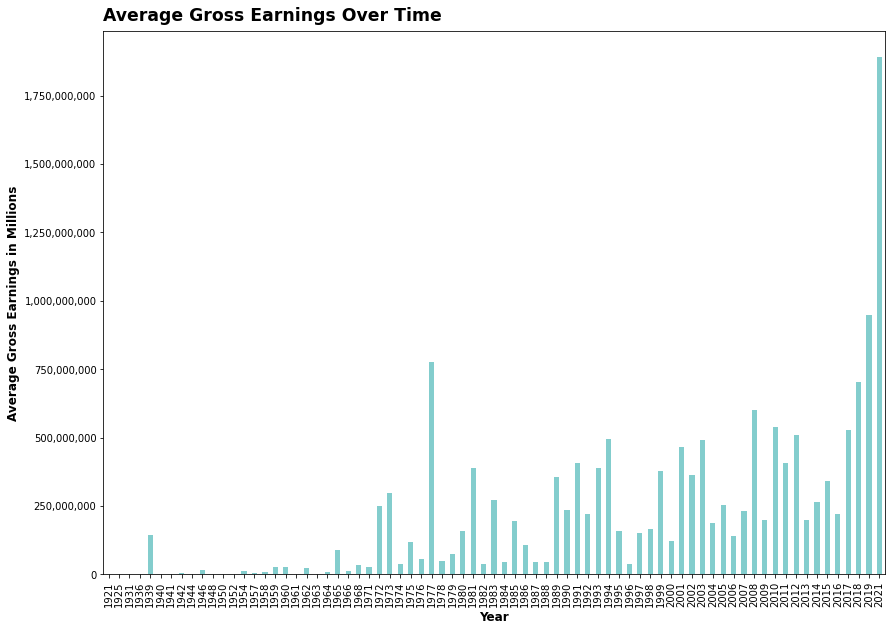

In [26]:
# Time Series of Gross Earnings
dfg = df.groupby('year')['gross_earnings'].mean().plot(kind = 'bar', color = '#099C9C', alpha = 0.5)
plt.ylabel("Average Gross Earnings in Millions", fontsize = 'large', weight = 'bold')
plt.xlabel("Year", fontsize = 'large', weight = 'bold')
current_values = plt.gca().get_yticks().tolist()
plt.gca().yaxis.set_major_locator(mticker.FixedLocator(current_values))
plt.gca().set_yticklabels(['{:,.00f}'.format(x) for x in current_values])
plt.title("Average Gross Earnings Over Time", loc = 'left', fontsize = 'xx-large', weight = 'bold', va = 'bottom')
plt.show()

The data shows that average gross earnings per movie has been on a healthy upward trend despite the diruption from popular streaming services. It is also interesting to note that COVID-19 did not seem to affect gross earnings much from 2019 to 2021.

### Top 5 Highest Grossing Films

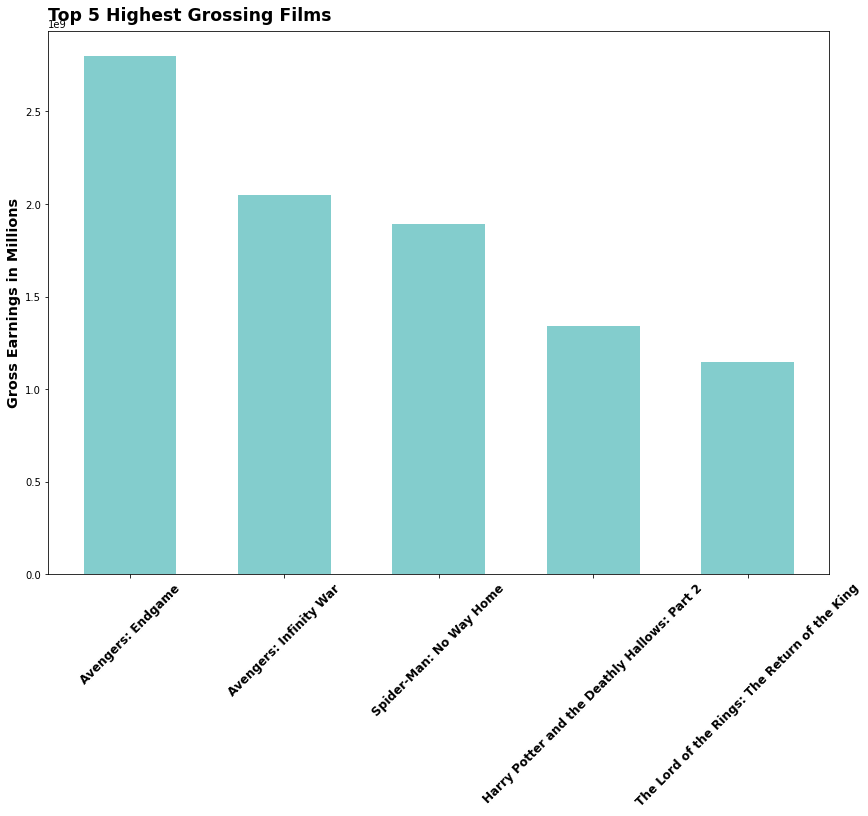

In [39]:
# Taking a look at the top 5 highest grossing movies of all time
highest_grossing_films = df[['name', 'gross_earnings']].sort_values(by='gross_earnings', ascending=False).iloc[:5]
plt.bar(x = highest_grossing_films['name'], height = highest_grossing_films['gross_earnings'], alpha = 0.5, color = '#099C9C', width = 0.6)
plt.ylabel('Gross Earnings in Millions', fontsize = 'x-large', weight = 'bold')
plt.xticks(rotation = 45, weight = 'bold', fontsize = 'large')
plt.title('Top 5 Highest Grossing Films', loc = 'left', fontsize = 'xx-large', weight = 'bold', va = 'bottom')
plt.show()

### Is there a positive correlation between budget and gross earnings?

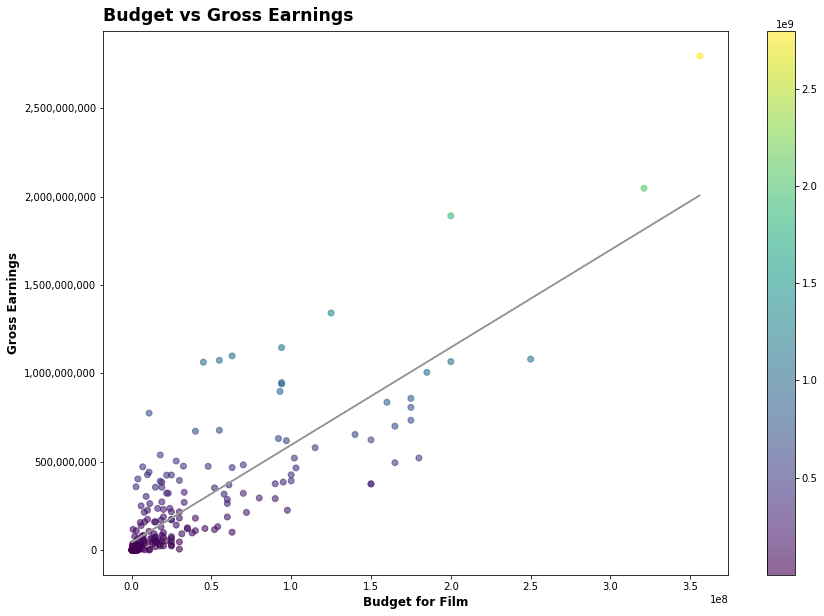

In [41]:
# Scatter plot with budget vs gross
plt.scatter(x = df['movie_budget_usd'], y = df['gross_earnings'], c = df.gross_earnings, cmap = 'viridis', alpha = 0.6)
plt.xlabel('Budget for Film', fontsize = 'large', weight = 'bold')
plt.ylabel('Gross Earnings', fontsize = 'large', weight = 'bold')
current_values = plt.gca().get_yticks().tolist()
plt.gca().yaxis.set_major_locator(mticker.FixedLocator(current_values))
plt.gca().set_yticklabels(['{:,.00f}'.format(x) for x in current_values])
plt.title("Budget vs Gross Earnings", loc = 'left', fontsize = 'xx-large', weight = 'bold', va = 'bottom')
plt.colorbar()
x = df['movie_budget_usd']
y = df['gross_earnings']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c = '0.6')
plt.show()

From the scatter plot above, as we expected, it looks like there is a strong positive correlation between `movie_budget_usd` and `gross_earnings` earnings. Movies that have higher budgets have produced higher gross earnings. 

What about user ratings/`imdb_ratings` and `gross_earnings`?

### Is there a positive correlation between score and gross earnings?

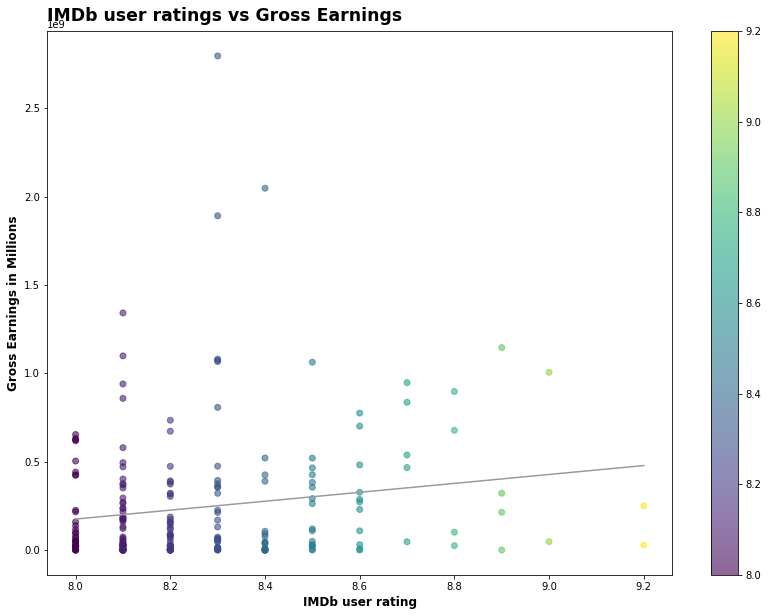

In [43]:
# Scatter plot with budget vs score
plt.scatter(x = df['imdb_ratings'], y = df['gross_earnings'], c = df.imdb_ratings, cmap = 'viridis', alpha = 0.6)
plt.xlabel('IMDb user rating', fontsize = 'large', weight = 'bold')
plt.ylabel('Gross Earnings in Millions', fontsize = 'large', weight = 'bold')
plt.title("IMDb user ratings vs Gross Earnings", loc = 'left', fontsize = 'xx-large', weight = 'bold', va = 'bottom')
plt.colorbar()
x = df['imdb_ratings']
y = df['gross_earnings']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c = '0.6')
plt.show()

While we thought that IMDb user ratings, `score`, would have a strong positive correlation with `gross` earnings, it does not look like the case from the data.

We could visualise every variable with gross earnings with a scatter plot, but a correlation matrix will give us a quicker overview at a glance.

###  Correlation Matrix for Numeric Variables

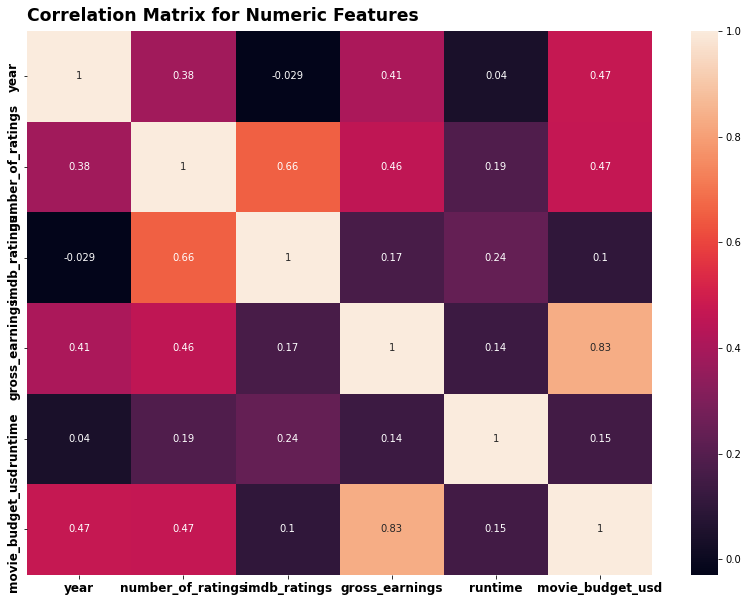

In [45]:
# Creating a correlation matrix to visualize correlation between numeric features
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.yticks(weight = 'bold', fontsize = 'large')
plt.xticks(weight = 'bold', fontsize = 'large')
plt.title('Correlation Matrix for Numeric Features', loc = 'left', fontsize = 'xx-large', weight = 'bold', va = 'bottom')
plt.show()

In this correlation matrix, we utilise the Pearson method to return correlation coefficients that range from +1 to -1 with +1 representing positive correlation, -1 representing a negative correlation, and 0 representing no relationship. The darkest color have the lowest correlation coefficient, and the lightest color has the highest correlation coefficient. 

Unsurprisingly, `movie_budget_usd` does have the highest correlation with gross earnings. But we did not expect that number of user `number_of_ratings` would have such a strong correlation with `gross_earnings`.

Lets take a look at the scatter plot of `number_of_ratings` with `gross_earnings`.

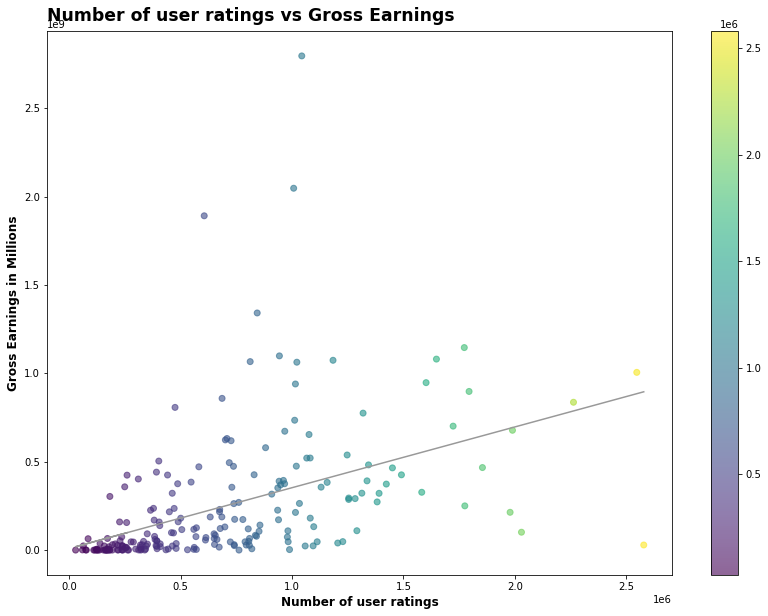

In [47]:
# Scatter plot with budget vs score
plt.scatter(x = df['number_of_ratings'], y = df['gross_earnings'], c = df.number_of_ratings, cmap = 'viridis', alpha = 0.6)
plt.xlabel('Number of user ratings', fontsize = 'large', weight = 'bold')
plt.ylabel('Gross Earnings in Millions', fontsize = 'large', weight = 'bold')
plt.title("Number of user ratings vs Gross Earnings", loc = 'left', fontsize = 'xx-large', weight = 'bold', va = 'bottom')
plt.colorbar()
x = df['number_of_ratings']
y = df['gross_earnings']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c = '0.6')
plt.show()

### Conclusion

Through this exploratory data analysis, we can confirm the following findings:

1. Despite the growing adoption of streaming services, movie's gross earnings have still been increasing over the years.
2. Gross earnings have the strongest positive correlation with `number_of_ratings` and `movie_budget_usd` - that is the films with the highest number of imdb user votes and highest budget return the highest gross earnings.